In [1]:
import pandas as pd 
import numpy as np  

import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline 

## Linear regression - Steps to follow:

1. Import libraries

2. Load dataset (xlsx, csv, sql)

3. check Head(), info(), describe()

4. Exploratiry Data Analysis (EDA):

missing values, 

outliers, 

convert categorical columns into numerical, 

standardize/normalize data (df['y'].reshape(-1, 1), X.reshape(-1, 1)

5. Visualize data: 

--univariant analysis (hist, box, barchart)

--bivariate analysis (hist, box, scatter)

--multivariate analysis (correlation plot, heatmap, pairplot)

Find parrents, anomalies in data.

6. Splot the data (test/train set - 80/20 or 70/30)

7. Import model from sklearn

8. Train your model with fit method

9. Prediction

10. Accuracy score



In [2]:
#homework - Module 8, assignment 1: data dataset, linear regression, r2_score.

df = pd.read_csv('data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [27]:
df.shape

(30, 2)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df.shape

(30, 2)

In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

<AxesSubplot:>

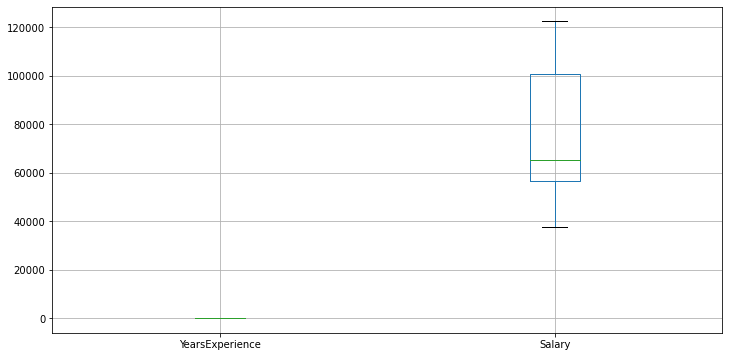

In [9]:
plt.figure(figsize=(12,6))
df.boxplot()

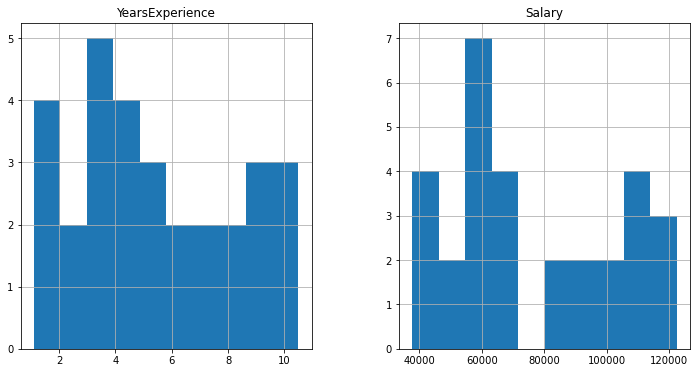

In [10]:
df.hist(figsize=(12,6))
plt.show()

<Figure size 720x576 with 0 Axes>

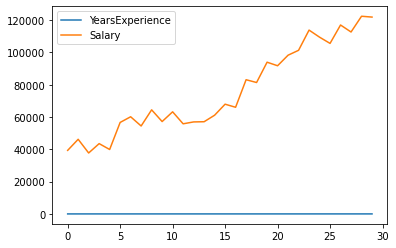

In [11]:
plt.figure(figsize=(10,8))
df.plot()
plt.show()

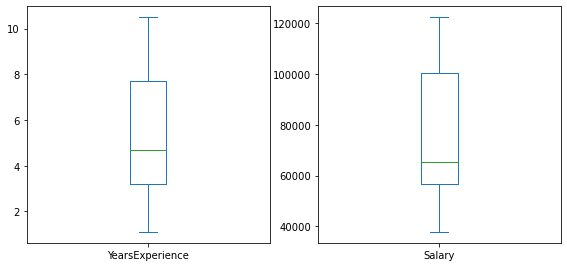

In [12]:
#plt.figure(figsize=(20,20))
df.plot(kind = 'box', subplots = True, layout = (4,4), figsize=(20,20))
plt.show()

In [13]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

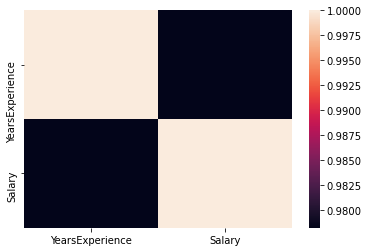

In [14]:
sns.heatmap(df.corr())

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#x=df.loc[:,['HP','Wt','AM']]
#x.head()
#y = df.MPG
#y = df[["Salary"]] - it convert Y, and Y into dataframes

X = df.drop('Salary', axis=1) 
y = df["Salary"] 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=0) 
print("Shape of the X_train", X_train.shape) 
print("Shape of the y_train", y_train.shape) 
print("Shape of the X_test", X_test.shape) 
print("Shape of the y_test", y_test.shape) 

Shape of the X_train (20, 1)
Shape of the y_train (20,)
Shape of the X_test (10, 1)
Shape of the y_test (10,)


In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
prediction=model.predict(X_test)

In [18]:
 prediction

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [19]:
#how to compare predict with y_test?
#y_test is ddataframe, predict is an arrray

#we converty_test into numly array

#y_test=y_test.values

#check:
#type(y_test)
#type(prediction)

In [20]:
from sklearn.metrics import r2_score

r2_score(y_test, prediction)

0.9749154407708353

In [21]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse= mean_squared_error(prediction, y_test)
rmse=np.sqrt(mse)
rmse

4585.4157204675885

In [22]:
r2_score(prediction, y_test)

0.9716987073632184

In [23]:
mean_absolute_error(prediction, y_test)

3426.4269374307078

In [24]:
#how to compare predict with y_test?
#y_test is ddataframe, predict is an arrray

#we converty_test into numly array

y_test=y_test.values

#check:
type(y_test)

numpy.ndarray

In [25]:
type(prediction)

numpy.ndarray

In [26]:
pd.DataFrame([y_test, prediction])

,0,1,2,3,4,5,6,7,8,9
0,37731.000000,122391.000000,57081.000000,63218.000000,116969.000000,109431.000000,112635.000000,55794.000000,83088.000000,101302.000000
1,40835.105909,123079.399408,65134.556261,63265.367772,115602.645454,108125.891499,116537.239698,64199.962017,76349.687193,100649.137545
